In [17]:
import numpy as np
import xarray as xr
import geopandas as gpd
from glob import glob
import matplotlib.pyplot as plt
from utils.pixc2raster import pixc2raster
from utils.functions import meter2deg, raster_directional_stats


In [37]:
lake_name = 'chaohu'
dir_pixc = f'data/{lake_name}-lake/swot-pixc'
paths_pixc_height = glob(dir_pixc + '/*height.nc')  # Get the first .nc file in the directory
path_lake_vec = f'data/{lake_name}-lake/hydrolake_{lake_name}.gpkg'
print(len(paths_pixc_height))
path_pixc_height = paths_pixc_height[3]

9


In [38]:
pixc_height_ds = xr.open_dataset(path_pixc_height)
lake_gdf = gpd.read_file(path_lake_vec)
pixc_height_ds

<xarray.Dataset> Size: 51MB
Dimensions:               (points: 1262536)
Coordinates:
    latitude              (points) float64 10MB ...
    longitude             (points) float64 10MB ...
Dimensions without coordinates: points
Data variables:
    geoid                 (points) float32 5MB ...
    ht_ortho_filter2      (points) float32 5MB ...
    ht_spahet             (points) float64 10MB ...
    ht_ortho_cor_filter2  (points) float64 10MB ...
Attributes:
    date:     2024-02-21

Text(0.5, 1.0, 'pixc corrected height_ortho(2024-02-21)')

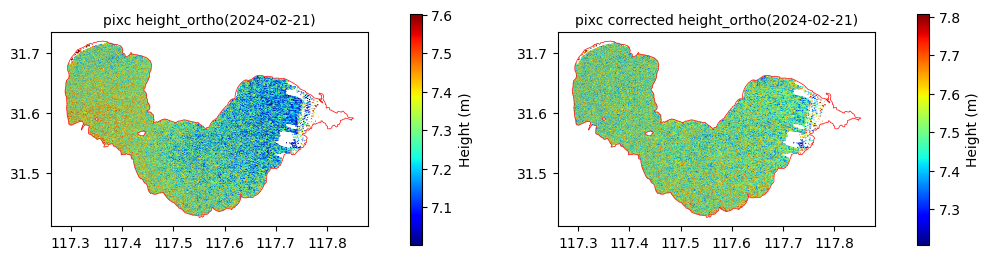

In [39]:
ht_ortho_mean = np.nanmean(pixc_height_ds.ht_ortho_filter2.values)
ht_ortho2_mean = np.nanmean(pixc_height_ds.ht_ortho_cor_filter2.values)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
## ax0
scat = ax[0].scatter(x= pixc_height_ds.longitude, y=pixc_height_ds.latitude, 
                      c=pixc_height_ds.ht_ortho_filter2.values,
                      vmin=ht_ortho_mean - 0.3,
                      vmax=ht_ortho_mean + 0.3,
                      s=0.5, edgecolor='none', cmap='jet')
lake_gdf.plot(ax=ax[0], color='none', edgecolor='red', linewidth=0.5)
plt.colorbar(scat, label='Height (m)', shrink=0.6, pad=0.1)  
ax[0].set_title('pixc height_ortho' + f'({pixc_height_ds.attrs["date"]})', fontsize=10)
## ax1
scat = ax[1].scatter(x=pixc_height_ds.longitude, y=pixc_height_ds.latitude, 
                      c=pixc_height_ds.ht_ortho_cor_filter2.values,
                      vmin=ht_ortho2_mean - 0.3,
                      vmax=ht_ortho2_mean + 0.3,
                      s=0.5, edgecolor='none', cmap='jet')
lake_gdf.plot(ax=ax[1], color='none', edgecolor='red', linewidth=0.5)
plt.colorbar(scat, label='Height (m)', shrink=0.6, pad=0.1)  
ax[1].set_title('pixc corrected height_ortho' + f'({pixc_height_ds.attrs["date"]})', fontsize=10)


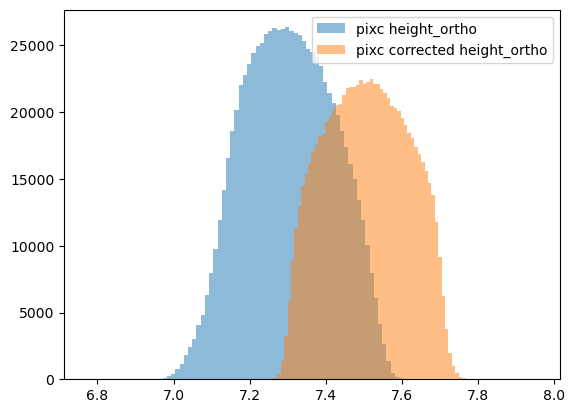

In [41]:
plt.hist(pixc_height_ds.ht_ortho_filter2.values, bins=100, 
                        alpha=0.5, label='pixc height_ortho');
plt.hist(pixc_height_ds.ht_ortho_cor_filter2.values, bins=100, 
                        alpha=0.5, label='pixc corrected height_ortho');
plt.legend();
